## Diagramme de bande

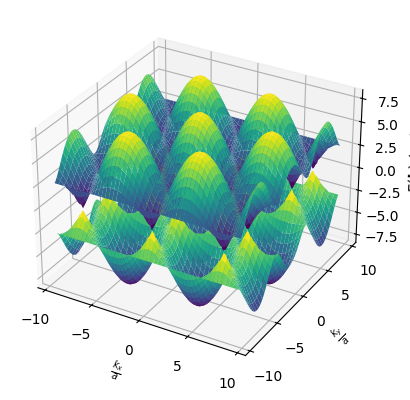

In [48]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0
a = 1 # Le paramètre de maille est donc l'unité de longueur
a_0 = a / np.sqrt(3)  # Le paramètre de maille est donc l'unité de longueur
t_hop = -2.7 # eV

kx = np.linspace(-3*np.pi,3*np.pi,1000)
ky = np.linspace(-3*np.pi,3*np.pi,1000)
kx, ky = np.meshgrid(kx, ky)

k = np.array([kx, ky])
a1 = a_0 / 2 * np.array([3, np.sqrt(3)])
a2 = a_0 / 2 * np.array([3, -np.sqrt(3)])

dot_k_a1 = np.tensordot(k, a1, axes=(0, 0))  
dot_k_a2 = np.tensordot(k, a2, axes=(0, 0))  
dot_k_a2_a1 = np.tensordot(k, a2 - a1, axes=(0, 0))

E_n = epsilon - t_hop * np.sqrt(3 + 2 * np.cos(dot_k_a2_a1) + 2 * np.cos(dot_k_a1) + 2 * np.cos(dot_k_a2))
E_p = epsilon + t_hop * np.sqrt(3 + 2 * np.cos(dot_k_a2_a1) + 2 * np.cos(dot_k_a1) + 2 * np.cos(dot_k_a2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(kx, ky, E_n, cmap='viridis')
ax.plot_surface(kx, ky, E_p, cmap='viridis')
ax.set_xlabel(r'$\frac{k_x}{a}$')
ax.set_ylabel(r'$\frac{k_y}{a}$')
ax.set_zlabel(r'E($\mathbf{k}$) (eV)')

plt.show()

In [56]:
import numpy as np
import scipy.fftpack

epsilon = 0
a = 1 # Le paramètre de maille est donc l'unité de longueur
t_hop = -2.7 # eV
hbar = 6.582119570e-16  # eV/s
time = np.linspace(0, 20e-15, 50)

a1 = a / 2 * np.array([3, np.sqrt(3)])
a2 = a / 2 * np.array([3, -np.sqrt(3)])

# Define grid in k-space
N = 300  # Number of points
L = 300   # Domain size in real space
kx = 2 * np.pi * np.fft.fftfreq(N, d=L / N)
ky = 2 * np.pi * np.fft.fftfreq(N, d=L / N)

KX, KY = np.meshgrid(kx, ky)

# Relation de disersion
t_hop = -2.7
E_k_p = epsilon + t_hop * np.sqrt(3 + 2 * np.cos(KX * (a2 - a1)[0] + KY * (a2 - a1)[1]) + 2 * np.cos(KX * a1[0] + KY * a1[1]) + 2 * np.cos(KX * a2[0] + KY * a2[1]))
E_k_n = epsilon - t_hop * np.sqrt(3 + 2 * np.cos(KX * (a2 - a1)[0] + KY * (a2 - a1)[1]) + 2 * np.cos(KX * a1[0] + KY * a1[1]) + 2 * np.cos(KX * a2[0] + KY * a2[1]))

def animate_from_jpgs(
    file_prefix, amount, filetype='.png', animation_name = 'animation.gif',
    fps=None, duration=None, delete = True):
    '''
    Vous pouvez changer les valeurs des variables en entrée pour avoir un
    fichier avec le nom et les FPS que vous préférez.
    '''

    import imageio.v2 as imageio
    import os

    images = []
    images_path = [
        file_prefix + str(frame) + filetype for frame in range(amount)
        ]

    for filename in images_path:
        images.append(imageio.imread(filename))

    if (fps and duration) is not None:
      raise(ValueError('Cannot give both fps and duration values. Choose one.'))

    elif fps is not None:
      imageio.mimsave(animation_name, images, fps=fps)

    elif duration is not None:
      imageio.mimsave(animation_name, images, duration=duration)

    else: imageio.mimsave(animation_name, images)

    if delete:
        for file in images_path:
            if os.path.isfile(file):
                os.remove(file)


# Compute time evolution factor
for i,t in enumerate(time):
    facteur_evolution_p = 1/np.sqrt(2) * np.exp(-1j * E_k_p * t / hbar)
    facteur_evolution_n = 1/np.sqrt(2) * np.exp(-1j * E_k_n * t / hbar)

    psi_k0 = np.ones_like(E_k_n, dtype=complex)

    psi_k_p = psi_k0 * facteur_evolution_p
    psi_k_n = psi_k0 * facteur_evolution_n

    psi_r_p = np.fft.ifft2(psi_k_p)
    psi_r_n = np.fft.ifft2(psi_k_n)

    psi_r_p = np.fft.fftshift(psi_r_p)
    psi_r_n = np.fft.fftshift(psi_r_n)


    x = np.linspace(-L/2, L/2, N)
    y = np.linspace(-L/2, L/2, N)

    densite_p = np.abs(psi_r_p)**2
    densite_n = np.abs(psi_r_n)**2

    # Plot results
    import matplotlib.pyplot as plt
    plt.imshow(densite_p, extent=[x.min(), x.max(), y.min(), y.max()])
    plt.colorbar(label="|ψ(r, t)|")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("")

    plt.savefig(f'wavefunction{i}.png')
    plt.clf()

    x, y = np.meshgrid(x, y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, densite_p, cmap='viridis')
    ax.plot_surface(x, y, densite_n, cmap='inferno')
    ax.set_xlabel(r'$\frac{k_x}{a_0}$')
    ax.set_ylabel(r'$\frac{k_y}{a_0}$')
    ax.set_zlabel(r'E($\mathbf{k}$) (eV)')
    ax.set_zlim(0, 0.1)
    plt.savefig(f'wavefunctionnn{i}.png')
    plt.clf()

plt.show()
plt.close()

animate_from_jpgs('wavefunction', len(time), fps=5, animation_name='wavefunction.gif', delete=True)
animate_from_jpgs('wavefunctionnn', len(time), fps=5, animation_name='wavefunctionnn.gif', delete=True)


C:\Users\marie\AppData\Local\Temp\ipykernel_28628\3571154760.py:98: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

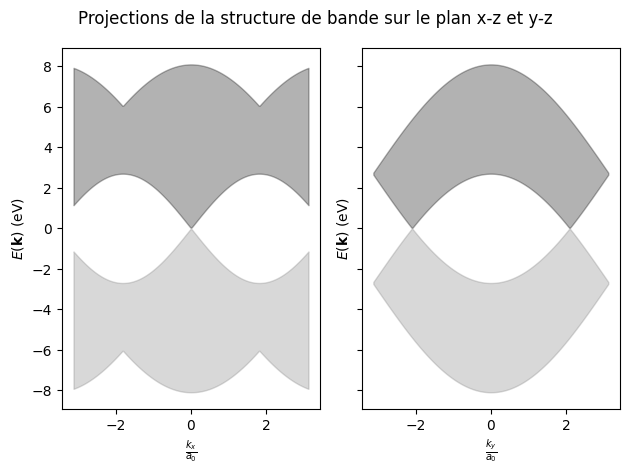

In [ ]:
kx_1d = kx[0]
ky_1d = ky[:, 0]

# Apply masks
mask_kx = np.abs(kx_1d) < np.pi
mask_ky = np.abs(ky_1d) < np.pi

fig, ax = plt.subplots(1, 2, sharex='all', sharey='all')

# --- projection x-z  ---
E_n_min_y = np.min(E_n, axis=0)
E_n_max_y = np.max(E_n, axis=0)
E_p_min_y = np.min(E_p, axis=0)
E_p_max_y = np.max(E_p, axis=0)

# Draw min-max projections as lines or filled bands
ax[0].fill_between(kx_1d[mask_kx], E_n_min_y[mask_kx], E_n_max_y[mask_kx], color='black', alpha=0.3, label='E_n')
ax[0].fill_between(kx_1d[mask_kx], E_p_min_y[mask_kx], E_p_max_y[mask_kx], color='gray', alpha=0.3, label='E_p')

# --- projection y-z ---
E_n_min_x = np.min(E_n, axis=1)
E_n_max_x = np.max(E_n, axis=1)
E_p_min_x = np.min(E_p, axis=1)
E_p_max_x = np.max(E_p, axis=1)

ax[1].fill_between(ky_1d[mask_ky], E_n_min_x[mask_ky], E_n_max_x[mask_ky], color='black', alpha=0.3, label='E_n')
ax[1].fill_between(ky_1d[mask_ky], E_p_min_x[mask_ky], E_p_max_x[mask_ky], color='gray', alpha=0.3, label='E_p')


# Labels and legend
ax[0].set_xlabel(r'$\frac{k_x}{a}$')
ax[0].set_ylabel(r'$E(\mathbf{k})$ (eV)')

ax[1].set_xlabel(r'$\frac{k_y}{a}$')
ax[1].set_ylabel(r'$E(\mathbf{k})$ (eV)')

fig.suptitle('Projections de la structure de bande sur le plan x-z et y-z')

plt.tight_layout()
plt.show()